In [6]:
import numpy as np
import pandas as pd
import math
import seaborn as sns
from sklearn.cluster import KMeans

#own functions
import functions as f

#accessing aws data
import sys
sys.path.append('../utils')
from db_utils import DBUtil 

#for ipython display
import matplotlib.pyplot as plt
from IPython.display import display, HTML
%matplotlib inline
pd.set_option('display.height', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 500)

In [7]:
DF = pd.read_pickle('../data/DFPants.pkl')

In [8]:
#DF.fillna(DF.mean(),inplace=True)
DF.dropna(axis=0,how='any',inplace=True)

In [9]:
DF.shape

(48801, 42)

In [10]:
num_cols = list(DF.columns.values)[2:]
numDF = DF[num_cols]

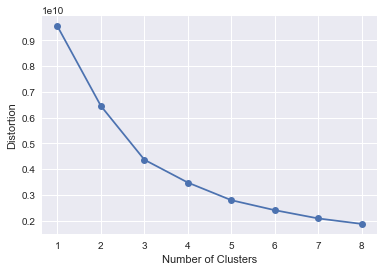

CPU times: user 29.8 s, sys: 3.69 s, total: 33.5 s
Wall time: 32.7 s


In [11]:
%%time
distortions = []
for i in range(1,9):
    km = KMeans(n_clusters=i,
                init='k-means++',
                n_init=10,
                max_iter=300,
                random_state=0)
    km.fit(numDF)
    distortions.append(km.inertia_)
plt.plot(range(1,9),distortions,marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.show()

In [13]:
"""%%time
## Applying average silhouette coefficient score method
from sklearn.metrics import silhouette_score
silhouettes = []
for i in range(2,5):
    km = KMeans(n_clusters=i,
                init='k-means++',
                n_init=10,
                max_iter=300,
                random_state=0)
    y_km = km.fit_predict(numDF)
    sil_score = silhouette_score(numDF,y_km,metric='euclidean')
    silhouettes.append((sil_score,i))
print silhouettes"""
''

''

In [16]:
## Elbow is hard to determine by plot initially, but with silhouette score the most optimal cluster is k = 2
## k = 2 and k = 4 were close in terms of scores that one can mistake elbow at k = 4 as well. 
## Apply k-means clustering and determine the number of clusters 
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300)
kmeans.fit(numDF)
c_km = kmeans.fit_predict(numDF)

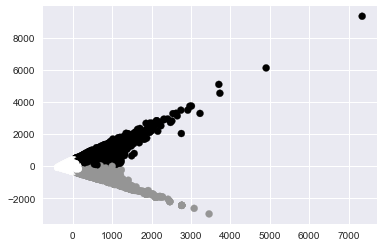

In [17]:
## Performing PCA to determine first 2 PCs
## Plot the first 2 PCs, color coded based on their cluster 
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(numDF)
pca_PCs = pca.transform(numDF)
plt.scatter(pca_PCs[:,0],pca_PCs[:,1],c=c_km)
plt.show()

In [18]:
df = numDF.copy()
df['cluster'] = c_km
cluster = np.unique(c_km)
## Find avg values of each cluster
averages = []
for i in cluster:
    temp_df = df.loc[df['cluster']==i]
    mean = temp_df.mean()
    averages.append(mean)

#averages for the values of each cluster
avg_df = pd.DataFrame(averages)
avg_df.head()    

,TOTAL_BOUGHT_2017,SHIPPED_SOLD_AMT_2017,AVG_SHIPPED_SOLD_AMT_2017,STD_SHIPPED_SOLD_AMT_2017,VAR_SHIPPED_SOLD_AMT_2017,DISCOUNT_2017,AVG_DISCOUNT_2017,STD_DISCOUNT_2017,VAR_DISCOUNT_2017,ENDUSE_HAS_CORE_2017,ENDUSE_HAS_WEAREVER_2017,ENDUSE_HAS_PUREJILL_2017,PAYTYPE_HAS_JJC_2017,PAYTYPE_HAS_VISA_2017,PAYTYPE_HAS_MC_2017,PAYTYPE_HAS_AMEX_2017,PAYTYPE_HAS_DISC_2017,PAYTYPE_HAS_DEBIT_2017,PAYTYPE_HAS_CASH_2017,PAYTYPE_HAS_CK_2017,PAYTYPE_HAS_OTHER_2017,FABRICCATEGORY_HAS_COTTON/COTTONBL_2017,FABRICCATEGORY_HAS_SYNTHETIC/SYNBLEND_2017,FABRICCATEGORY_HAS_LINEN/LINENBL_2017,ENDUSE_%_CORE_2017,ENDUSE_%_WEAREVER_2017,ENDUSE_%_PUREJILL_2017,PAYTYPE_%_JJC_2017,PAYTYPE_%_VISA_2017,PAYTYPE_%_MC_2017,PAYTYPE_%_AMEX_2017,PAYTYPE_%_DISC_2017,PAYTYPE_%_DEBIT_2017,PAYTYPE_%_CASH_2017,PAYTYPE_%_CK_2017,PAYTYPE_%_OTHER_2017,FABRICCATEGORY_%_COTTON/COTTONBL_2017,FABRICCATEGORY_%_SYNTHETIC/SYNBLEND_2017,FABRICCATEGORY_%_LINEN/LINENBL_2017,N_PANTS2018,cluster
0,4.469562,199.471456,46.008154,9.749289,137.026769,84.318097,18.827848,6.409999,65.010009,0.917662,0.266137,0.385628,0.579054,0.278743,0.124358,0.084971,0.021329,0.031143,0.015611,0.002500,0.044121,0.757639,0.318742,0.180288,0.731181,0.103493,0.165325,0.545281,0.230453,0.096170,0.068814,0.016328,0.016541,0.007132,0.001355,0.017925,0.463611,0.122347,0.064899,0.942954,0.0
1,5.067494,245.349376,49.330539,28.560999,850.547664,70.009123,13.753229,10.742622,137.040674,0.946673,0.287170,0.348933,0.600764,0.280166,0.120025,0.086597,0.022445,0.046323,0.027380,0.002229,0.092646,0.784304,0.343680,0.173193,0.758897,0.105542,0.135561,0.546758,0.214641,0.083519,0.065121,0.015424,0.021769,0.013083,0.000577,0.039108,0.461582,0.127084,0.057184,0.978192,1.0
2,18.449166,889.854972,49.933747,16.572041,297.541879,349.225043,18.919313,9.508628,98.109624,0.990647,0.585401,0.770842,0.753355,0.252542,0.126678,0.101464,0.023993,0.036600,0.022977,0.003457,0.100041,0.970516,0.681375,0.372102,0.694204,0.104310,0.201538,0.690665,0.148643,0.063922,0.060806,0.011697,0.007329,0.003292,0.001143,0.012526,0.480732,0.126715,0.051542,3.553070,2.0


In [19]:
df.head()

,TOTAL_BOUGHT_2017,SHIPPED_SOLD_AMT_2017,AVG_SHIPPED_SOLD_AMT_2017,STD_SHIPPED_SOLD_AMT_2017,VAR_SHIPPED_SOLD_AMT_2017,DISCOUNT_2017,AVG_DISCOUNT_2017,STD_DISCOUNT_2017,VAR_DISCOUNT_2017,ENDUSE_HAS_CORE_2017,ENDUSE_HAS_WEAREVER_2017,ENDUSE_HAS_PUREJILL_2017,PAYTYPE_HAS_JJC_2017,PAYTYPE_HAS_VISA_2017,PAYTYPE_HAS_MC_2017,PAYTYPE_HAS_AMEX_2017,PAYTYPE_HAS_DISC_2017,PAYTYPE_HAS_DEBIT_2017,PAYTYPE_HAS_CASH_2017,PAYTYPE_HAS_CK_2017,PAYTYPE_HAS_OTHER_2017,FABRICCATEGORY_HAS_COTTON/COTTONBL_2017,FABRICCATEGORY_HAS_SYNTHETIC/SYNBLEND_2017,FABRICCATEGORY_HAS_LINEN/LINENBL_2017,ENDUSE_%_CORE_2017,ENDUSE_%_WEAREVER_2017,ENDUSE_%_PUREJILL_2017,PAYTYPE_%_JJC_2017,PAYTYPE_%_VISA_2017,PAYTYPE_%_MC_2017,PAYTYPE_%_AMEX_2017,PAYTYPE_%_DISC_2017,PAYTYPE_%_DEBIT_2017,PAYTYPE_%_CASH_2017,PAYTYPE_%_CK_2017,PAYTYPE_%_OTHER_2017,FABRICCATEGORY_%_COTTON/COTTONBL_2017,FABRICCATEGORY_%_SYNTHETIC/SYNBLEND_2017,FABRICCATEGORY_%_LINEN/LINENBL_2017,N_PANTS2018,cluster
0,9.0,378.84,42.093333,15.642059,244.674025,208.10,23.122222,3.723835,13.866944,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.556,0.444,0.000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.444,0.0,0.0,0
7,3.0,123.32,41.106667,35.605170,1267.728133,54.68,18.226667,15.797726,249.568133,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000,0.000,0.000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0,1
9,2.0,124.60,62.300000,0.000000,0.000000,53.40,26.700000,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.000,0.000,0.0,0.0,0
11,8.0,393.64,49.205000,10.663724,113.715000,198.36,24.795000,5.371951,28.857857,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.875,0.000,0.125,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.375,0.000,0.0,1.0,0
16,7.0,435.19,62.170000,21.400472,457.980200,149.81,21.401429,12.055949,145.345914,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.000,0.000,0.000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000,0.000,0.0,0.0,0


In [23]:
temp = DF[['ILINK']].merge(df,left_index=True,right_index=True)

In [25]:
temp.to_pickle('../data/PantsCust_2017_clustered.pkl')